In [21]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
from glob import glob
from hydra import initialize, compose
from matplotlib import colors
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [22]:
dir = os.path.join(array_dir, 'sample_skypy_lens')

check backgrounds

In [23]:
bkg_paths = glob(dir + '/bkg_*')
pprint(bkg_paths)

bkgs = [np.load(i) for i in bkg_paths]

['/data/bwedig/mejiro/output/arrays/sample_skypy_lens/bkg_1.npy',
 '/data/bwedig/mejiro/output/arrays/sample_skypy_lens/bkg_3.npy',
 '/data/bwedig/mejiro/output/arrays/sample_skypy_lens/bkg_5.npy']


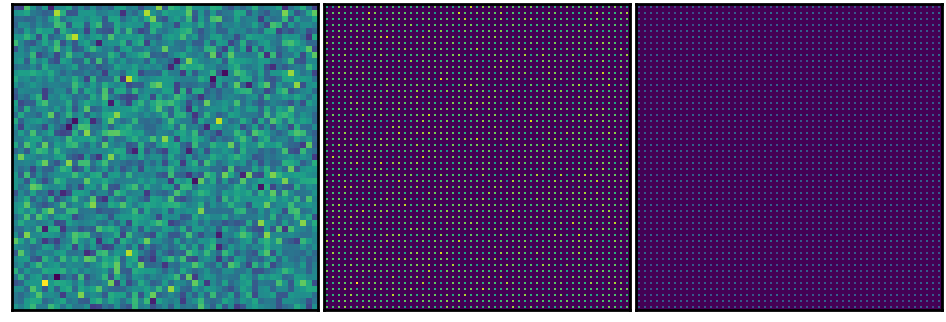

In [24]:
plot.plot_list(bkgs)

load all

In [25]:
grid_oversample = [1, 3, 5]
num_samples = [100, 1000]  # , 10000, 100000, 1000000, 10000000

# ideal = np.load(os.path.join(dir, 'sample_skypy_lens_5_10000000.npy'))

# all_files = glob(dir + '/sample_skypy_lens_*.npy')
# grid_1 = [np.load(i) for i in all_files if '_1_' in i]
# grid_3 = [np.load(i) for i in all_files if '_3_' in i]
# grid_5 = [np.load(i) for i in all_files if '_5_' in i]

grid_1, grid_3, grid_5 = [], [], []

for grid in grid_oversample:
    for num in num_samples:
        file = glob(dir + f'/sample_skypy_lens_{grid}_{num}.npy')[0]
        array = np.load(file)
        if grid == 1:
            grid_1.append(array)
        elif grid == 3:
            grid_3.append(array)
        elif grid == 5:
            grid_5.append(array)

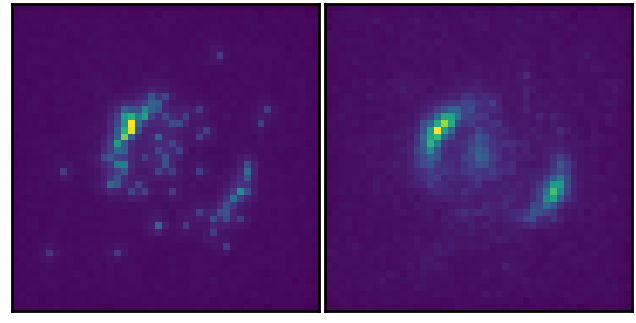

In [26]:
plot.plot_list(grid_1)

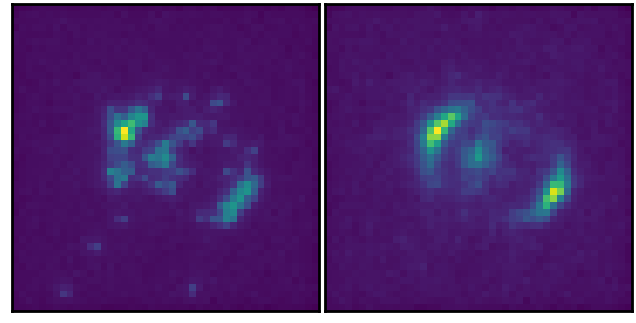

In [27]:
plot.plot_list(grid_3)

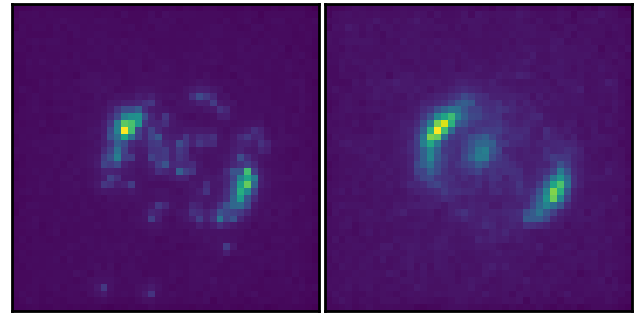

In [28]:
plot.plot_list(grid_5)

In [29]:
execution_time_1 = np.load(os.path.join(dir, 'execution_time_1.npy'))
execution_time_3 = np.load(os.path.join(dir, 'execution_time_3.npy'))
execution_time_5 = np.load(os.path.join(dir, 'execution_time_5.npy'))

execution_time_x_1 = np.load(os.path.join(dir, 'execution_time_x_1.npy'))
execution_time_x_3 = np.load(os.path.join(dir, 'execution_time_x_3.npy'))
execution_time_x_5 = np.load(os.path.join(dir, 'execution_time_x_5.npy'))

print(execution_time_x_1)
print(execution_time_1)

[[   1  100]
 [   1 1000]]
[252.36485887 249.42449474]


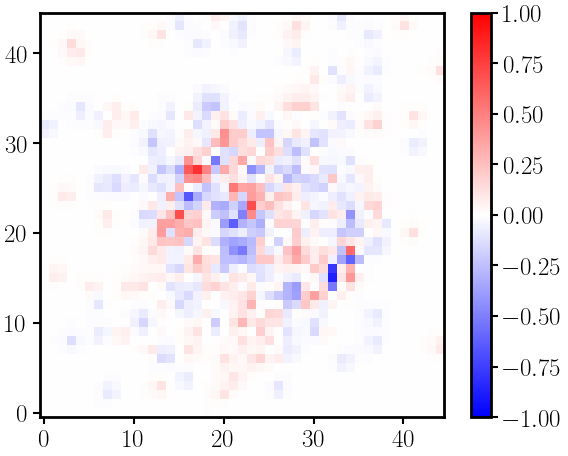

In [36]:
plt.imshow(grid_5[1] - grid_3[1], cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

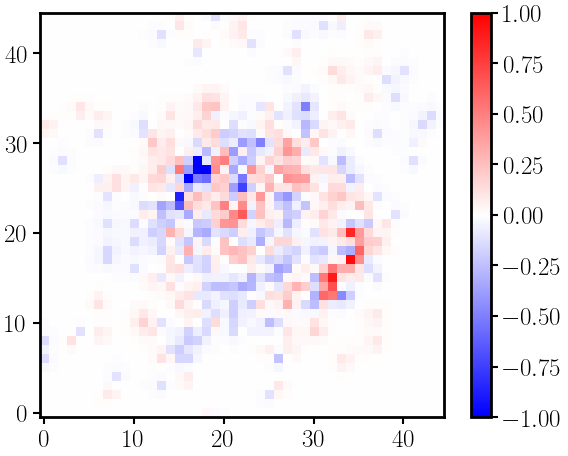

In [37]:
plt.imshow(grid_3[1] - grid_1[1], cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

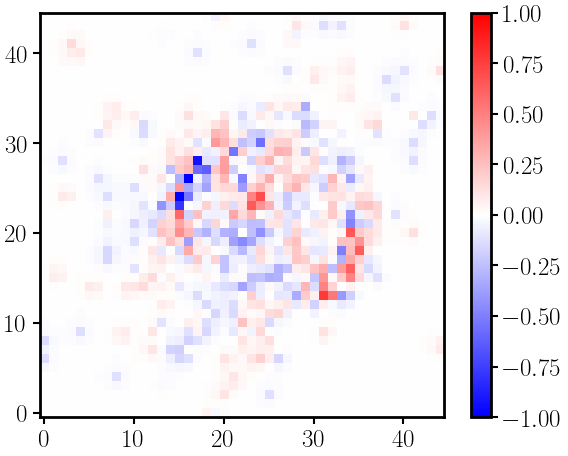

In [38]:
plt.imshow(grid_5[1] - grid_1[1], cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

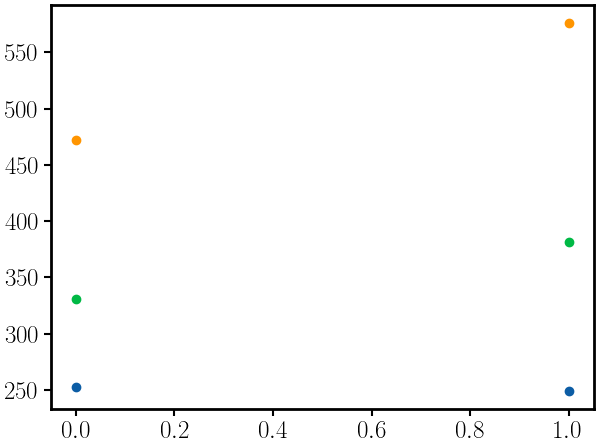

In [33]:
f, ax = plt.subplots()

ax.scatter([0, 1], execution_time_1)
ax.scatter([0, 1], execution_time_3)
ax.scatter([0, 1], execution_time_5)